Příprava dat

In [23]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = pd.read_csv("adm_data.csv")
data = data.rename(columns={'Serial No.' :'No.', 'GRE Score' :'GRE','TOEFL Score' :'TOEFL','CGPA' :'AVG_mark', 'University Rating' :'Rating', 'ChanceofAdmit': 'Chance'})
data.columns = data.columns.str.replace(' ', '')
labels = {0: "no", 1: "yes"}
data["Research"] = data["Research"].map(labels)

data.head()



,No.,GRE,TOEFL,Rating,SOP,LOR,AVG_mark,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,yes,0.92
1,2,324,107,4,4.0,4.5,8.87,yes,0.76
2,3,316,104,3,3.0,3.5,8.00,yes,0.72
3,4,322,110,3,3.5,2.5,8.67,yes,0.80
4,5,314,103,2,2.0,3.0,8.21,no,0.65


In [22]:
data

,No.,GRE,TOEFL,Rating,SOP,LOR,AVG_mark,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


1.Výpočet průměru a mediánu

In [2]:
print(data["TOEFL"].mean())
print(data["TOEFL"].median())

107.41
107.0


2.Výpočet směrodatné odchylky

In [3]:
data['TOEFL'].std()

6.069513777374126

3.Vytvoření histogramu pro TOEFL score.

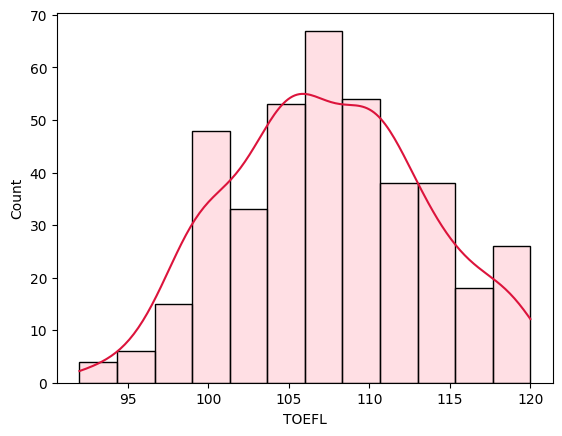

In [4]:

ax = sns.histplot(data=data, x="TOEFL", kde=True, color="pink")
ax.lines[0].set_color('crimson')

4. Test na normální rozdělení dat - normaltest.

Formulovala jsem hypotézy:

+ Nulová hypotéza(H0): Data mají normální rozdělení.
+ Alternativní hypotéza(H1): Data nemají normální rozdělení.


In [5]:
stats.normaltest(data["TOEFL"])

NormaltestResult(statistic=11.070212103496331, pvalue=0.003945790155853822)

Výsledek je nižší než 0.05 a proto jsem zamítla nulovou hypotézu. Platí hypotéza H1, data nemají normální rozdělení.

Testování hypotéz

Nejprve jsem zjistila kolik dat je v každé skupině.

In [6]:
data["Research"].value_counts()

Research
yes    219
no     181
Name: count, dtype: int64

Rozdělila jsem data na studenty, kteří mají (data_yes) a nemají zkušenost s výzkumem (data_no).

In [7]:
data_yes = data[data["Research"] == "yes"]
data_no = data[data["Research"] == "no"]

Pro obě skupiny jsem spočítala průměrné GRE skóre.

In [8]:
data_yes["GRE"].mean()

322.85388127853884

In [9]:
data_no["GRE"].mean()

309.49171270718233

Statisticky otestujte, zda existuje statisticky významný rozdíl v GRE skóre mezi těmito dvěma skupinami studentů.

Uvažujme následující dvojici hypotéz:

+ Nulová hypotéza(H0):mezi těmito dvěma skupinami studentů není statisticky významný rozdíl v GRE skóre
+ Alternativní hypotéza(H1):mezi těmito dvěma skupinami studentů je statisticky významný rozdíl v GRE skóre

Rozhodla jsem se použít t-test. Výpočet jsem provedla s využitím modulu scipy, funkce stats.ttest_ind 

In [10]:
stats.ttest_ind(data_yes["GRE"], data_no["GRE"])

TtestResult(statistic=14.218609390981028, pvalue=2.168740602699294e-37, df=398.0)

Vyšla mi phodnota 2.168740602699294e-37. Uložila jsem si výsledky do proměnných.

In [11]:
statistics, pvalue = stats.ttest_ind(data_yes["GRE"], data_no["GRE"])

Použila jsem format_float_positional z modulu numpy, abych si zobrazila výsledek jako desetinné číslo.  

In [12]:
np.format_float_positional(pvalue)

'0.0000000000000000000000000000000000002168740602699294'

ttest zamítl nulovou hypotézu nulovou hypotézu na zvolené hladině významnosti 5%. Z toho jsem vyvodila závěr, že existuje statisticky významný rozdíl mezi GRE score studentů, kteří mají zkušenost s výzkumem a kteří nemají. 

Korelace

1. Vypočítala jsem korelaci mezi TOEFL skóre a GRE skóre.

In [13]:
korelace = data['TOEFL'].corr(data['GRE'])
print(korelace)

0.8359768030143961


2.Hodnota 0.8359768030143961 je blízko 1 a proto je poměrně vysoká. To znamená, že mezi TOEFL skóre a GRE skóre existuje silná pozitivní korelace.

In [14]:
data.head()

,No.,GRE,TOEFL,Rating,SOP,LOR,AVG_mark,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,yes,0.92
1,2,324,107,4,4.0,4.5,8.87,yes,0.76
2,3,316,104,3,3.0,3.5,8.00,yes,0.72
3,4,322,110,3,3.5,2.5,8.67,yes,0.80
4,5,314,103,2,2.0,3.0,8.21,no,0.65


In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = pd.read_csv("adm_data.csv")
data = data.rename(columns={'Serial No.' :'No.', 'GRE Score' :'GRE','TOEFL Score' :'TOEFL','CGPA' :'AVG_mark', 'University Rating' :'Rating', 'ChanceofAdmit': 'Chance'})
data.columns = data.columns.str.replace(' ', '')
data.head()

,No.,GRE,TOEFL,Rating,SOP,LOR,AVG_mark,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
data.corr()

,No.,GRE,TOEFL,Rating,SOP,LOR,AVG_mark,Research,ChanceofAdmit
No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
AVG_mark,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
ChanceofAdmit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


3. Vytvořila jsem korelační graf pro vysvětlovanou proměnnou (ChanceofAdmit)  a proměnnou, která je s ní nejvíce korelovaná -  AVG_mark.

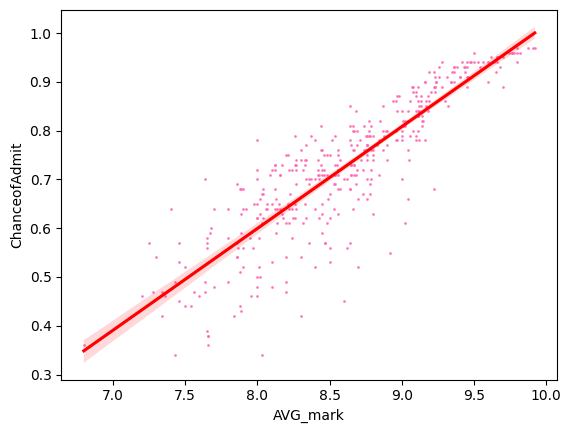

In [3]:
g = sns.regplot(data, x="AVG_mark", y="ChanceofAdmit",color="hotpink", scatter_kws={"s": 1}, line_kws={"color":"r"})

Vysvětlovaná proměnná

Vytvořila jsem boxplot pro vysvětlovanou proměnnou (ChanceofAdmit) 

In [25]:
np.quantile(data["ChanceofAdmit"], 0.25)

0.64

In [26]:
np.quantile(data["ChanceofAdmit"], 0.75)

0.83

<Axes: xlabel='ChanceofAdmit'>

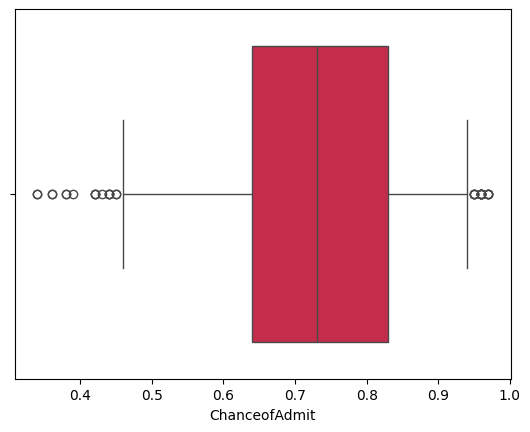

In [4]:
sns.boxplot(data, x="ChanceofAdmit",color="crimson",whis=[5, 95])

In [18]:
q3 = np.quantile(data["ChanceofAdmit"], 0.75)
q1 = np.quantile(data["ChanceofAdmit"], 0.25)

iqr = (q3 - q1) * 1.5

lower_limit = q1 - iqr
filtered_data = data[data["ChanceofAdmit"] > lower_limit]
filtered_data



,No.,GRE,TOEFL,Rating,SOP,LOR,AVG_mark,Research,ChanceofAdmit,Cook Distance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000509
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000628
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002830
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.001998
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000009
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,0.000082
396,397,325,107,3,3.0,3.5,9.11,1,0.84,0.000652
397,398,330,116,4,5.0,4.5,9.45,1,0.91,0.000006
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0.001769


Lineární regrese

1. Sestavila jsem rovnici pro lineární regresi.

In [5]:
formula = "ChanceofAdmit ~ AVG_mark + GRE + TOEFL + Rating + SOP + LOR"
mod = smf.ols(formula=formula, data=data)# funkce ols - nejmenších čtverců, popisuje chybovost na druhou
res = mod.fit()# metoda fit - vypočítá přímku
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceofAdmit   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     259.9
Date:                Sat, 11 May 2024   Prob (F-statistic):          1.99e-133
Time:                        21:08:18   Log-Likelihood:                 532.59
No. Observations:                 400   AIC:                            -1051.
Df Residuals:                     393   BIC:                            -1023.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4139      0.115    -12.247      0.000      -1.641      -1.187
AVG_mark       0.1199      0.012      9.709      0.000       0.096       0.144
GRE            0.0023      0.001      3.938      0.000       0.001       0.003
TOEFL          0.0028      0.001      2.503      0.013       0.001       0.005
Rating         0.0061      0.005      1.258      0.209      -0.003       0.016
SOP           -0.0020      0.006     -0.350      0.727      -0.013       0.009
LOR            0.0227      0.006      4.063      0.000       0.012       0.034
==============================================================================
Omnibus:                       93.313   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.389
Skew:                          -1.190   Prob(JB):                     5.61e-46
Kurtosis:                       5.615   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3.Interpretujte koeficienty modelu.

Největší vliv na přijetí na vysokou školu má na prvním místě proměnná AVG_mark.Na druhém pak LOR. 

4. Koeficient determinace R-squared má hodnotu 0,799 a to znamená, že dokáže vysvětlit přibližně 79,9% variability vysvětlované proměnné ChanceofAdmition.

5. Spočítala jsem Cookovu vzdálenost pro jednotlivé body.

In [6]:
from statsmodels.stats.outliers_influence import OLSInfluence

formula = "ChanceofAdmit ~ AVG_mark + GRE + TOEFL + Rating + SOP + LOR"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results) # vliv každého bodu na jednotlivé koeficienty
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,No.,GRE,TOEFL,Rating,SOP,LOR,AVG_mark,Research,ChanceofAdmit,Cook Distance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000509
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000628
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002830
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.001998
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000009


Jednoduché pravidlo (rule of the thumb) doporučuje odstranit hodnoty s Cookovou vzdáleností vyšší než 1.

In [7]:
data = data[data['Cook Distance'] < 1]
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceofAdmit   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     259.9
Date:                Sat, 11 May 2024   Prob (F-statistic):          1.99e-133
Time:                        21:08:27   Log-Likelihood:                 532.59
No. Observations:                 400   AIC:                            -1051.
Df Residuals:                     393   BIC:                            -1023.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4139      0.115    -12.247      0.000      -1.641      -1.187
AVG_mark       0.1199      0.012      9.709      0.000       0.096       0.144
GRE            0.0023      0.001      3.938      0.000       0.001       0.003
TOEFL          0.0028      0.001      2.503      0.013       0.001       0.005
Rating         0.0061      0.005      1.258      0.209      -0.003       0.016
SOP           -0.0020      0.006     -0.350      0.727      -0.013       0.009
LOR            0.0227      0.006      4.063      0.000       0.012       0.034
==============================================================================
Omnibus:                       93.313   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.389
Skew:                          -1.190   Prob(JB):                     5.61e-46
Kurtosis:                       5.615   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

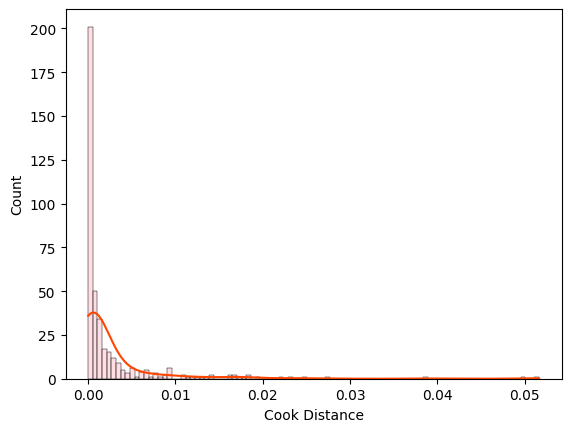

In [8]:
ax = sns.histplot(data=data, x="Cook Distance", kde=True, color="pink")
ax.lines[0].set_color('orangered')